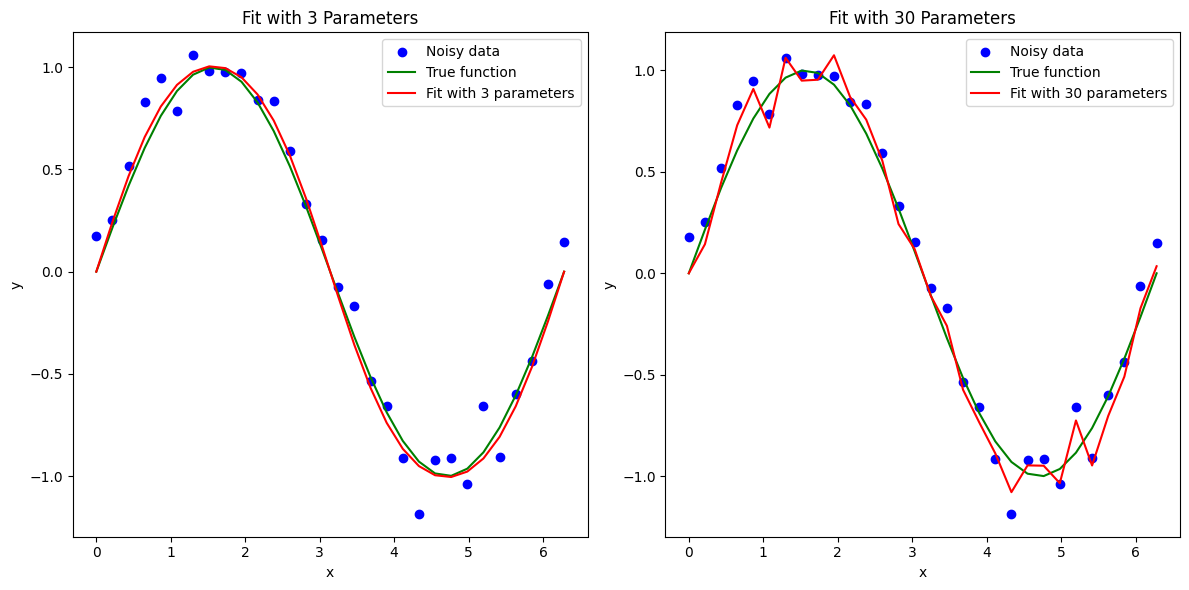

Mean Squared Error with 3 parameters: 0.01244
Mean Squared Error with 30 parameters: 0.00571


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import lstsq

# Generate 30 noisy data points
np.random.seed(0)  
N = 30
x = np.linspace(0, 2 * np.pi, N)
true_y = np.sin(x)  
noise = np.random.normal(0, 0.1, N)
y = true_y + noise  

# Define a function to create the design matrix for a given number of parameters (sinusoids)
def create_design_matrix(x, K):
    """
    Creates a design matrix where each column corresponds to sin(kx) for k from 1 to K.
    """
    X = np.column_stack([np.sin(k * x) for k in range(1, K + 1)])
    return X

# Fit the model with 3 parameters
K1 = 3
X1 = create_design_matrix(x, K1)
# Solve the least squares problem
a1, residuals1, rank1, s1 = lstsq(X1, y, rcond=None)
# Predicted y values
y_pred1 = X1 @ a1

# Fit the model with 30 parameters
K2 = 30
X2 = create_design_matrix(x, K2)
# Solve the least squares problem
a2, residuals2, rank2, s2 = lstsq(X2, y, rcond=None)
# Predicted y values
y_pred2 = X2 @ a2

# Plot the data and the fits
plt.figure(figsize=(12, 6))

# Plot for model with 3 parameters
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue', label='Noisy data')
plt.plot(x, true_y, color='green', label='True function')
plt.plot(x, y_pred1, color='red', label='Fit with 3 parameters')
plt.title('Fit with 3 Parameters')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x, y, color='blue', label='Noisy data')
plt.plot(x, true_y, color='green', label='True function')
plt.plot(x, y_pred2, color='red', label='Fit with 30 parameters')
plt.title('Fit with 30 Parameters')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

mse1 = np.mean((y - y_pred1) ** 2)
mse2 = np.mean((y - y_pred2) ** 2)
print(f"Mean Squared Error with 3 parameters: {mse1:.5f}")
print(f"Mean Squared Error with 30 parameters: {mse2:.5f}")


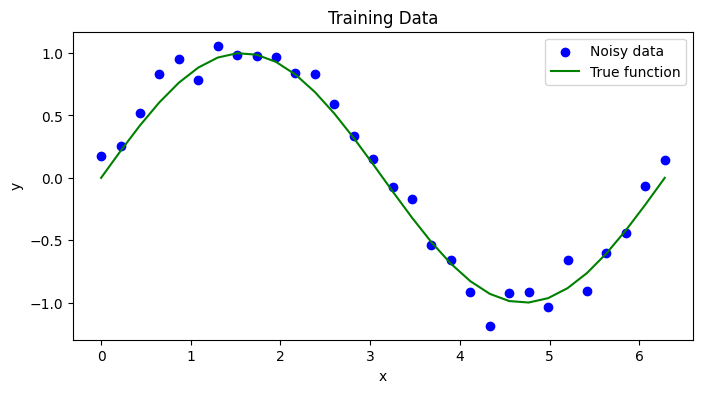

Epoch 1/1000, Loss: 0.533951
Epoch 100/1000, Loss: inf
Epoch 200/1000, Loss: nan
Epoch 300/1000, Loss: nan
Epoch 400/1000, Loss: nan
Epoch 500/1000, Loss: nan
Epoch 600/1000, Loss: nan
Epoch 700/1000, Loss: nan
Epoch 800/1000, Loss: nan
Epoch 900/1000, Loss: nan
Epoch 1000/1000, Loss: nan


/Users/hakkizade/anaconda3/lib/python3.11/site-packages/numpy/_core/_methods.py:136: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tv/rmqplby57832024rl1d9w0yc0000gn/T/ipykernel_22567/2525895250.py:54: RuntimeWarning: overflow encountered in square
  loss = np.mean((y - f_x) ** 2)
/var/folders/tv/rmqplby57832024rl1d9w0yc0000gn/T/ipykernel_22567/2525895250.py:51: RuntimeWarning: overflow encountered in matmul
  f_x = X @ theta  # Shape (N_data,)
/var/folders/tv/rmqplby57832024rl1d9w0yc0000gn/T/ipykernel_22567/2525895250.py:58: RuntimeWarning: invalid value encountered in matmul
  gradient = (-2 / N_data) * X.T @ (y - f_x)  # Shape (N,)


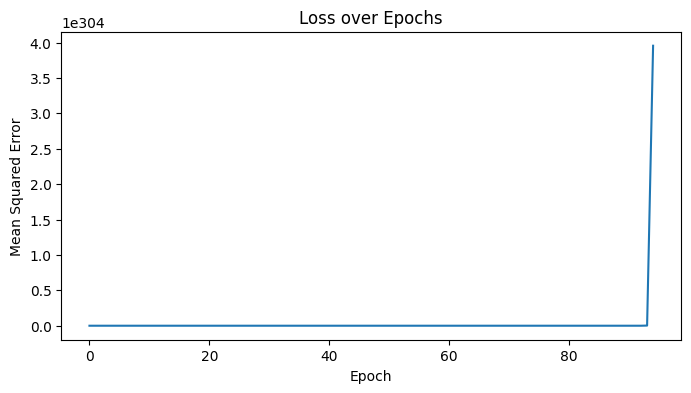

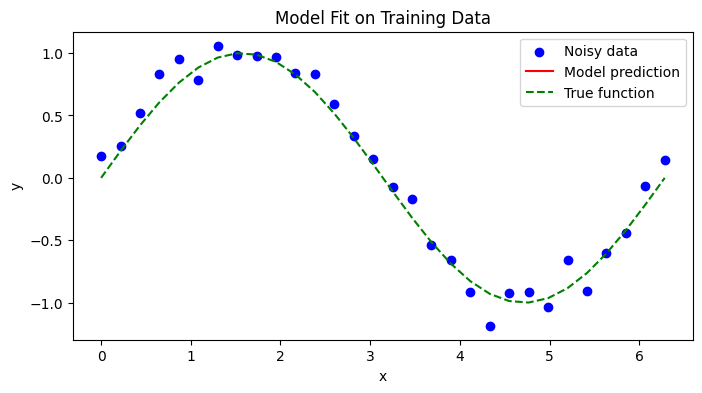

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 30 noisy data points
np.random.seed(0)  # For reproducibility
N_data = 30
x = np.linspace(0, 2 * np.pi, N_data)
true_y = np.sin(x)
noise = np.random.normal(0, 0.1, N_data)
y = true_y + noise

# Plot the data
plt.figure(figsize=(8, 4))
plt.scatter(x, y, color='blue', label='Noisy data')
plt.plot(x, true_y, color='green', label='True function')
plt.title('Training Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Set the number of basis functions
N = 1000  # Number of basis functions

# Generate R1 and R2: Rademacher variables (-1 or 1 with equal probability)
R1 = np.random.choice([-1, 1], size=N)
R2 = np.random.choice([-1, 1], size=N)

# Generate Z: uniformly random over the domain [0, 2*pi]
Z = np.random.uniform(0, 2 * np.pi, size=N)

# Construct the design matrix X of shape (N_data, N)
X = np.zeros((N_data, N))
for j in range(N_data):
    x_j = x[j]
    relu_input = R2 * (x_j - Z)  # Shape (N,)
    relu_output = np.maximum(0, relu_input)
    X[j, :] = R1 * relu_output

# Initialize theta to zeros
theta = np.zeros(N)

# Set hyperparameters
learning_rate = 0.01
epochs = 1000

# Training loop using gradient descent
loss_history = []
for epoch in range(epochs):
    # Compute predictions
    f_x = X @ theta  # Shape (N_data,)
    
    # Compute loss (Mean Squared Error)
    loss = np.mean((y - f_x) ** 2)
    loss_history.append(loss)
    
    # Compute gradient
    gradient = (-2 / N_data) * X.T @ (y - f_x)  # Shape (N,)
    
    # Update theta
    theta -= learning_rate * gradient
    
    # Print progress every 100 epochs
    if (epoch + 1) % 100 == 0 or epoch == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.6f}")

# Plot the loss over epochs
plt.figure(figsize=(8, 4))
plt.plot(loss_history)
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.show()

# Compute predictions on training data
y_pred = X @ theta

# Plot the results
plt.figure(figsize=(8, 4))
plt.scatter(x, y, color='blue', label='Noisy data')
plt.plot(x, y_pred, color='red', label='Model prediction')
plt.plot(x, true_y, color='green', linestyle='--', label='True function')
plt.title('Model Fit on Training Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [ ]:
# Data Generation:
# Generate 30 data points x evenly spaced between 0 and 2π, representing the true function sin(x) with added Gaussian noise.

# Basis Functions:
# With N=1000, generate 1000 random basis functions.
# Rademacher variables R1 and R2 are randomly assigned -1 or 1, and Z values are randomly chosen within the domain.
# Each basis function is defined as: f_i(x) = R1_i * ReLU(R2_i * (x - Z_i)).

# Model Initialization:
# Initialize parameter vector θ to zeros.

# Gradient Descent Training:
# Perform gradient descent to minimise Mean Squared Error between predictions and noisy observations.
# Compute gradients with respect to θ and update with a learning rate of 0.01 over 1000 epochs.

# Visualisation:
# Plot training loss over epochs to observe convergence.
# Plot model predictions against noisy data and the true function to assess fit.

# Overfitting Assessment:
# Overfitting may occur if the model captures both underlying patterns and noise, failing to generalise to new data.

# Indicators of Overfitting:
# - High parameter-to-data ratio: 1000 parameters (θ_i) vs. 30 data points increases overfitting risk.
# - Very low training loss might indicate noise fitting.
# - Complex model due to random basis functions with ReLU activations.
# - Prediction curve oscillations through noisy points suggest overfitting.

# Conclusion:
# Likely overfitting due to high model complexity and limited data.
# Confirm by evaluating on test data or cross-validation.




Test Loss (Mean Squared Error): nan


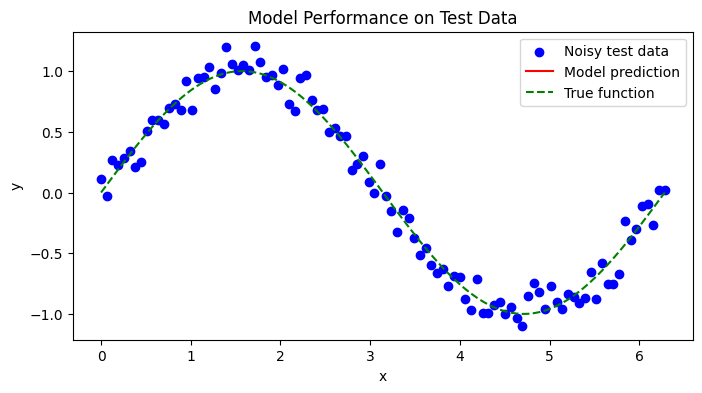

In [4]:
# Generate test data
x_test = np.linspace(0, 2 * np.pi, 100)
y_test_true = np.sin(x_test)
noise_test = np.random.normal(0, 0.1, 100)
y_test = y_test_true + noise_test

# Construct design matrix for test data
X_test = np.zeros((len(x_test), N))
for j in range(len(x_test)):
    x_j = x_test[j]
    relu_input = R2 * (x_j - Z)
    relu_output = np.maximum(0, relu_input)
    X_test[j, :] = R1 * relu_output

# Compute predictions on test data
y_test_pred = X_test @ theta

# Compute test loss
test_loss = np.mean((y_test - y_test_pred) ** 2)
print(f"Test Loss (Mean Squared Error): {test_loss:.6f}")

# Plot the results on test data
plt.figure(figsize=(8, 4))
plt.scatter(x_test, y_test, color='blue', label='Noisy test data')
plt.plot(x_test, y_test_pred, color='red', label='Model prediction')
plt.plot(x_test, y_test_true, color='green', linestyle='--', label='True function')
plt.title('Model Performance on Test Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()